# Project Overview
#### For this project, I will use data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.

# Business Understanding

#### To diversify its portfolio, your organisation is growing into new industries. They want to buy and run aeroplanes for both individual and commercial use, but they have no idea what the possible risks associated with aviation are. Your job is to figure out which aeroplane the corporation should start this new venture with the least amount of danger. Next, in order to assist the head of the new aviation division in making an aircraft purchase decision, you need to convert your research findings into practical insights.

# Data Understanding and Analysis


In [2351]:
#Import the required library
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Reading the files into DataFrame that  i will use to explore the different options available to make it a usable DataFrame.

In [2261]:
#Reading the files into specific DataFrame
Aviationdata = pd.read_csv('AviationData.csv', encoding = "latin1")
Aviationdata

c:\Users\Hp\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [2262]:
Statecodes = pd.read_csv('USState_Codes.csv', encoding = "latin1")
Statecodes

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
...,...,...
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO


##### Getting to understand the DataFrame structure

In [2263]:
#Getting an overview of the DataFrame
Aviationdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [2264]:
#Getting an overview of the DataFrame
Statecodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [2265]:
#Understanding the Number of columns and rows
Aviationdata.shape

(88889, 31)

In [2266]:
#Understanding the Number of columns and rows
Statecodes.shape

(62, 2)

In [2267]:
#Understanding the stastical data of the dataframe
Aviationdata.describe().sum()

Number.of.Engines         82817.593096
Total.Fatal.Injuries      77843.133815
Total.Serious.Injuries    76541.823964
Total.Minor.Injuries      77338.592686
Total.Uninjured           83712.239074
dtype: float64

In [2268]:
#Understanding the stastical data of the dataframe
Aviationdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [2269]:
Statecodes.describe()

,US_State,Abbreviation
count,62,62
unique,62,62
top,Hawaii,VT
freq,1,1


In [2352]:
type(Aviationdata)
type(Statecodes)

pandas.core.frame.DataFrame

In [2272]:
Aviationdata.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [2273]:
Statecodes.columns

Index(['US_State', 'Abbreviation'], dtype='object')

In [2274]:
#The below code allows us to see the first 5 rows of the content of the Dataframe
Aviationdata.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [2275]:
Statecodes.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [2276]:
#The code below allows us to check on the bottom 5 rows of the Dataframe
Aviationdata.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [2277]:
Statecodes.tail()

,US_State,Abbreviation
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO
61,Pacific ocean,PO


In [2278]:
#The code below is to split the location column into city and State abbreviations
Aviationdata[["City","Abbreviation"]]=Aviationdata["Location"].str.split(",",n=1,expand=True)
Aviationdata.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,City,Abbreviation
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,MOOSE CREEK,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,BRIDGEPORT,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,Saltville,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,EUREKA,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,Canton,OH


##### Data Cleaning

In [2279]:
Aviationdata.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
City    

In [2280]:
Statecodes.isnull().sum()

US_State        0
Abbreviation    0
dtype: int64

In [2281]:
#Checking on duplicated elements in the Dataframe
Aviationdata.duplicated().sum()

0

In [2282]:
Statecodes.duplicated().sum()

0

In [2283]:
Aviationdata.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'City', 'Abbreviation'],
      dtype='object')

In [2284]:
#The code below allows us to drop null values in the Statecodes Dataframe
#At this point i did not feel it was wise for me to drop null values from the Aviationdata Dataframe
Statecodes.dropna()
Statecodes

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
...,...,...
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO


In [2285]:
#The code below allows us to replace the misspelled Cesna with Cessna
Aviationdata['Make'].replace({'CESNA': 'CESSNA'}, inplace=True)

Aviationdata['Make']

0                           Stinson
1                             Piper
2                            Cessna
3                          Rockwell
4                            Cessna
                    ...            
88884                         PIPER
88885                      BELLANCA
88886    AMERICAN CHAMPION AIRCRAFT
88887                        CESSNA
88888                         PIPER
Name: Make, Length: 88889, dtype: object

In [2286]:
#The code below changes the data in Make column into uppercase
Aviationdata['Make'] = Aviationdata['Make'].str.upper()
Aviationdata['Make']

0                           STINSON
1                             PIPER
2                            CESSNA
3                          ROCKWELL
4                            CESSNA
                    ...            
88884                         PIPER
88885                      BELLANCA
88886    AMERICAN CHAMPION AIRCRAFT
88887                        CESSNA
88888                         PIPER
Name: Make, Length: 88889, dtype: object

In [2287]:
Aviationdata.describe().sum()

Number.of.Engines         82817.593096
Total.Fatal.Injuries      77843.133815
Total.Serious.Injuries    76541.823964
Total.Minor.Injuries      77338.592686
Total.Uninjured           83712.239074
dtype: float64

##### Using the mean of the below numerical values the below codes is to replace the null values with the mean. This allows to have wider data sample

In [2288]:
#Finding the sum of Null values in the Number.of.Engines column
Aviationdata['Number.of.Engines'].isna().sum()

6084

In [2289]:
#Finding the mean of the Number.of.Engines column
Mean_Number_of_Engines = Aviationdata['Number.of.Engines'].mean()
Mean_Number_of_Engines 

1.1465853511261397

In [2290]:
#Filling the Null values in the Number.of.Engines column with the mean
Aviationdata['Number.of.Engines'] = Aviationdata['Number.of.Engines'].fillna(Mean_Number_of_Engines)

In [2291]:
#Validating all null values have been filled
Aviationdata['Number.of.Engines'].isna().sum()

0

In [2292]:
#Finding the Null values in the Total.Fatal.Injuries column
Aviationdata['Total.Fatal.Injuries'].isna().sum()

11401

In [2293]:
#Finding the mean of the Total.Fatal.Injuries column
Mean_Total_Fatal_Injuries = Aviationdata['Total.Fatal.Injuries'].mean()
Mean_Total_Fatal_Injuries

0.6478551517654346

In [2294]:
#Filling the Null values in the Total.Fatal.Injuries column with the mean
Aviationdata['Total.Fatal.Injuries'] = Aviationdata['Total.Fatal.Injuries'].fillna(Mean_Total_Fatal_Injuries)

In [2295]:
#Validating all null values have been filled
Aviationdata['Total.Fatal.Injuries'].isna().sum()

0

In [2296]:
# Finding the Null values in theTotal.Serious.Injuries column
Aviationdata['Total.Serious.Injuries'].isna().sum()

12510

In [2297]:
#Finding the mean of the Total.Serious.Injuries column
Mean_Total_Serious_Injuries = Aviationdata['Total.Serious.Injuries'].mean()
Mean_Total_Serious_Injuries

0.27988059545162935

In [2298]:
#Filling the Null values in the Total.Serious.Injuries column with the mean
Aviationdata['Total.Serious.Injuries'] = Aviationdata['Total.Serious.Injuries'].fillna(Mean_Total_Serious_Injuries)

In [2299]:
#Validating all null values have been filled
Aviationdata['Total.Serious.Injuries'].isna().sum()

0

In [2300]:
#Finding the sum of Null values in the Total.Minor.Injuries column
Aviationdata['Total.Minor.Injuries'].isna().sum()

11933

In [2301]:
#Finding the mean of the Total.Minor.Injuries column
Mean_Total_minor_Injuries = Aviationdata['Total.Minor.Injuries'].mean()
Mean_Total_minor_Injuries

0.3570611778158948

In [2302]:
#Filling the Null values in the Total.Serious.Injuries column with the mean
Aviationdata['Total.Minor.Injuries'] = Aviationdata['Total.Minor.Injuries'].fillna(Mean_Total_minor_Injuries)

In [2303]:
#Validating all null values have been filled
Aviationdata['Total.Minor.Injuries'].isna().sum()

0

In [2304]:
#Finding the sum of Null values in the Total.Uninjured column
Aviationdata['Total.Uninjured'].isna().sum()

5912

In [2305]:
#Finding the mean of the Total.Uninjured column
Mean_Total_Uninjured = Aviationdata['Total.Uninjured'].mean()
Mean_Total_Uninjured

5.325439579642552

In [2306]:
#Filling the Null values in the Total.Uninjured column column with the mean
Aviationdata['Total.Uninjured'] = Aviationdata['Total.Uninjured'].fillna(Mean_Total_Uninjured)

In [2307]:
#Validating all null values have been filled
Aviationdata['Total.Uninjured'].isna().sum()

0

In [2308]:
Aviationdata.describe().sum()

Number.of.Engines         88901.577544
Total.Fatal.Injuries      89244.417780
Total.Serious.Injuries    89051.991070
Total.Minor.Injuries      89271.794278
Total.Uninjured           89623.294826
dtype: float64

In [2309]:
Aviationdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,88889.0,1.146585,0.430959,0.0,1.0,1.0,1.000000,8.0
Total.Fatal.Injuries,88889.0,0.647855,5.122070,0.0,0.0,0.0,0.647855,349.0
Total.Serious.Injuries,88889.0,0.279881,1.431309,0.0,0.0,0.0,0.279881,161.0
Total.Minor.Injuries,88889.0,0.357061,2.080156,0.0,0.0,0.0,0.357061,380.0
Total.Uninjured,88889.0,5.325440,26.969386,0.0,0.0,1.0,2.000000,699.0


##### Non- Categorical null values filling with the mode

In [2310]:
#Finding out the sum of the null values in the Make column
Aviationdata['Make'].isna().sum()

63

In [2311]:
#Finding out the Mode of the Column make
Mode_Make = Aviationdata['Make'].mode()[0]
Mode_Make

'CESSNA'

In [2312]:
#Replacing the null values of the column make with the mode from the column make
Aviationdata['Make'] = Aviationdata['Make'].fillna(Mode_Make)

In [2313]:
#Validating the changes made to response should be 0
Aviationdata['Make'].isna().sum()

0

In [2314]:
#Finding out the sum of the null values in the column Purpose.of.flight
Aviationdata['Purpose.of.flight'].isna().sum()

6192

In [2315]:
#Finding out the mode in the column Purpose.of.flight
Mode_Purpose_of_Flight = Aviationdata['Purpose.of.flight'].mode()[0]
Mode_Purpose_of_Flight

'Personal'

In [2316]:
#Replacing the null values with the mode in the column Purpose.of.flight
Aviationdata['Purpose.of.flight'] = Aviationdata['Purpose.of.flight'].fillna(Mode_Purpose_of_Flight)

In [2317]:
#Validating the changes made in the column Purpose.of.flight
Aviationdata['Purpose.of.flight'].isna().sum()

0

In [2318]:
#Finding out the sum of the null values in Aircraft.Category column
Aviationdata['Aircraft.Category'].isna().sum()

56602

In [2319]:
#Finding out the mode in Aircraft.Category column
Mode_Aircraft_Category = Aviationdata['Aircraft.Category'].mode()[0]
Mode_Aircraft_Category

'Airplane'

In [2320]:
#Replacing the null values with the mode in Aircraft.Category column
Aviationdata['Aircraft.Category'] = Aviationdata['Aircraft.Category'].fillna(Mode_Aircraft_Category)

In [2321]:
#Validating the changes in Aircraft.Category column
Aviationdata['Aircraft.Category'].isna().sum()

0

In [2322]:
Aviationdata['Broad.phase.of.flight'].isna().sum()


27165

In [2323]:
Mode_phase_of_flight = Aviationdata['Broad.phase.of.flight'].mode()[0]
Mode_phase_of_flight
Aviationdata['Broad.phase.of.flight'] = Aviationdata['Broad.phase.of.flight'].fillna(Mode_phase_of_flight)
Aviationdata['Broad.phase.of.flight'].isna().sum()

0

In [2324]:
Aviationdata['Engine.Type'].isna().sum()

7077

In [2325]:
Mode_Engine_type = Aviationdata['Engine.Type'].mode()[0]
Mode_Engine_type 
Aviationdata['Engine.Type'] = Aviationdata['Engine.Type'].fillna(Mode_Engine_type)
Aviationdata['Engine.Type'].isna().sum()

0

In [2326]:
Aviationdata['Aircraft.damage'].isna().sum()

3194

In [2327]:
Mode_Aircraft_Damage = Aviationdata['Aircraft.damage'].mode()[0]
Mode_Aircraft_Damage 
Aviationdata['Aircraft.damage'] = Aviationdata['Aircraft.damage'].fillna(Mode_Aircraft_Damage)
Aviationdata['Aircraft.damage'].isna().sum()

0

In [2328]:
#Now dropping columns that i will not be using further from this stage in the Aviationdata Dataframe
Aviationdata = Aviationdata.drop(['Latitude','Longitude', 'Airport.Code','Airport.Name', 'Model','Schedule', 'FAR.Description'], axis=1)
Aviationdata

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,City,Abbreviation
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Airplane,NC6404,...,2.0,0.000000,0.000000,0.00000,UNK,Cruise,Probable Cause,NaN,MOOSE CREEK,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Airplane,N5069P,...,4.0,0.000000,0.000000,0.00000,UNK,Unknown,Probable Cause,19-09-1996,BRIDGEPORT,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,N5142R,...,3.0,0.279881,0.357061,5.32544,IMC,Cruise,Probable Cause,26-02-2007,Saltville,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Airplane,N1168J,...,2.0,0.000000,0.000000,0.00000,IMC,Cruise,Probable Cause,12-09-2000,EUREKA,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,N15NY,...,1.0,2.000000,0.357061,0.00000,VMC,Approach,Probable Cause,16-04-1980,Canton,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,Substantial,Airplane,N1867H,...,0.0,1.000000,0.000000,0.00000,NaN,Landing,NaN,29-12-2022,Annapolis,MD
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,Substantial,Airplane,N2895Z,...,0.0,0.000000,0.000000,0.00000,NaN,Landing,NaN,NaN,Hampton,NH
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,...,0.0,0.000000,0.000000,1.00000,VMC,Landing,NaN,27-12-2022,Payson,AZ
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,Substantial,Airplane,N210CU,...,0.0,0.000000,0.000000,0.00000,NaN,Landing,NaN,NaN,Morgan,UT


In [2329]:
#Aligning the date format in the Event.Date column and saving the change
Aviationdata['Event.Date']=pd.to_datetime(Aviationdata['Event.Date'])
Aviationdata.to_csv('Aviationdata.csv', index=False)

##### For this new business venture my recommendation would be the pilot phase of the project be done in the United States as there exist a ready market and proper facilities that would enable the business to thrive, with a three year plan to explore expansion to the rest of North America Continent and by the 5th year of operations to other viable continents.

In [2330]:
#Filtering data to remain with information from the United States
Aviationdata = Aviationdata[Aviationdata['Country'] == "United States"]
Aviationdata

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,City,Abbreviation
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Airplane,NC6404,...,2.0,0.000000,0.000000,0.00000,UNK,Cruise,Probable Cause,NaN,MOOSE CREEK,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Airplane,N5069P,...,4.0,0.000000,0.000000,0.00000,UNK,Unknown,Probable Cause,19-09-1996,BRIDGEPORT,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,N5142R,...,3.0,0.279881,0.357061,5.32544,IMC,Cruise,Probable Cause,26-02-2007,Saltville,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Airplane,N1168J,...,2.0,0.000000,0.000000,0.00000,IMC,Cruise,Probable Cause,12-09-2000,EUREKA,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,N15NY,...,1.0,2.000000,0.357061,0.00000,VMC,Approach,Probable Cause,16-04-1980,Canton,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,Substantial,Airplane,N1867H,...,0.0,1.000000,0.000000,0.00000,NaN,Landing,NaN,29-12-2022,Annapolis,MD
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,Substantial,Airplane,N2895Z,...,0.0,0.000000,0.000000,0.00000,NaN,Landing,NaN,NaN,Hampton,NH
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,...,0.0,0.000000,0.000000,1.00000,VMC,Landing,NaN,27-12-2022,Payson,AZ
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,Substantial,Airplane,N210CU,...,0.0,0.000000,0.000000,0.00000,NaN,Landing,NaN,NaN,Morgan,UT


##### The below code is to select specific Aircraft category (Helicopter and Airplane ) and purpose of flight that will be used in line to the business requirments to endeveour in commercial and Private entreprise in the aviation industry.

In [2331]:
# Filter the DataFrame to keep only the specified values
filtered_df = Aviationdata.loc[
    (Aviationdata['Aircraft.Category'].isin(["Airplane", "Helicopter"]))]
Aviationdata = Aviationdata.drop(Aviationdata.index[~Aviationdata.index.isin(filtered_df.index)])
Aviationdata.reset_index(drop=True, inplace=True)

print(Aviationdata)

             Event.Id Investigation.Type Accident.Number Event.Date  \
0      20001218X45444           Accident      SEA87LA080 1948-10-24   
1      20001218X45447           Accident      LAX94LA336 1962-07-19   
2      20061025X01555           Accident      NYC07LA005 1974-08-30   
3      20001218X45448           Accident      LAX96LA321 1977-06-19   
4      20041105X01764           Accident      CHI79FA064 1979-08-02   
...               ...                ...             ...        ...   
81041  20221227106491           Accident      ERA23LA093 2022-12-26   
81042  20221227106494           Accident      ERA23LA095 2022-12-26   
81043  20221227106497           Accident      WPR23LA075 2022-12-26   
81044  20221227106498           Accident      WPR23LA076 2022-12-26   
81045  20221230106513           Accident      ERA23LA097 2022-12-29   

              Location        Country Injury.Severity Aircraft.damage  \
0      MOOSE CREEK, ID  United States        Fatal(2)       Destroyed   
1

In [2332]:
#Dropping the rows with null values
Aviationdata = Aviationdata.dropna()
Aviationdata

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,City,Abbreviation
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,CF-TLU,...,0.647855,0.279881,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,BOSTON,MA
22,20020917X01657,Accident,ATL82DA027,1982-01-02,"CHAMBLEE, GA",United States,Non-Fatal,Substantial,Helicopter,N5745Y,...,0.000000,0.000000,0.0,1.0,VMC,Approach,Probable Cause,02-01-1983,CHAMBLEE,GA
33,20020917X02254,Accident,LAX82FA038,1982-01-04,"NEAR LAS VEGAS, NV",United States,Fatal(2),Destroyed,Airplane,N1956H,...,2.000000,0.000000,0.0,0.0,VMC,Cruise,Probable Cause,04-01-1983,NEAR LAS VEGAS,NV
38,20020917X01906,Accident,DCA82AA009,1982-01-05,"ITHACA, NY",United States,Fatal(2),Destroyed,Airplane,N546BA,...,2.000000,0.000000,0.0,0.0,VMC,Approach,Probable Cause,05-01-1983,ITHACA,NY
42,20020917X02156,Accident,LAX82DA037,1982-01-05,"SPRINGERVILLE, AZ",United States,Non-Fatal,Substantial,Airplane,N738XP,...,0.000000,0.000000,0.0,1.0,VMC,Taxi,Probable Cause,05-01-1983,SPRINGERVILLE,AZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80783,20220919105967,Accident,ANC22LA077,2022-09-16,"Anchorage, AK",United States,Minor,Substantial,Airplane,N2340S,...,0.000000,1.000000,0.0,1.0,VMC,Landing,The pilots inadvertent application of the bra...,15-12-2022,Anchorage,AK
80793,20220920105976,Accident,ANC22LA078,2022-09-19,"Egegik, AK",United States,Minor,Substantial,Airplane,N24BR,...,0.000000,2.000000,0.0,1.0,VMC,Landing,The pilots loss of control during takeoff in ...,15-12-2022,Egegik,AK
80803,20220926106000,Accident,ANC22LA081,2022-09-23,"Chignik Lake, AK",United States,Non-Fatal,Substantial,Airplane,N4144E,...,0.000000,0.000000,0.0,1.0,VMC,Landing,The pilots failure to maintain airplane contr...,15-12-2022,Chignik Lake,AK
80828,20221031106225,Accident,CEN22LA441,2022-09-29,"Shell Lake, WI",United States,Non-Fatal,Substantial,Airplane,N5152S,...,0.000000,0.000000,0.0,1.0,VMC,Landing,"A collision with a deer during landing, which ...",20-12-2022,Shell Lake,WI


In [2333]:
#Copying the Dataframe to another that will allow for Visualization
Aviationdata2= Aviationdata

In [2334]:
#Saving the Dataframe to use in Tableau for Dashboards
Aviationdata2.to_csv('Aviationdata2.csv', index=False)

#### Data Visualization

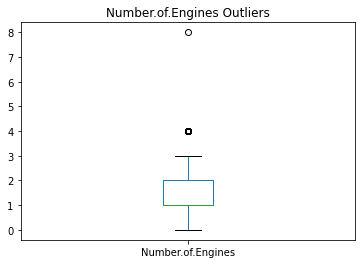

In [2335]:
Aviationdata2.boxplot(column = ['Number.of.Engines'], grid = False)
plt.title ('Number.of.Engines Outliers')
plt.show()

##### From above boxplot code the recommendation would be acquire planes with 1 or 2 Engines with a concentration on 2 Engine planes

In [2379]:
Aviationdata2.groupby(['Make', 'Total.Fatal.Injuries']).size().reset_index(name='counts').sort_values(by='count', ascending=True).head(10)



KeyError: 'count'

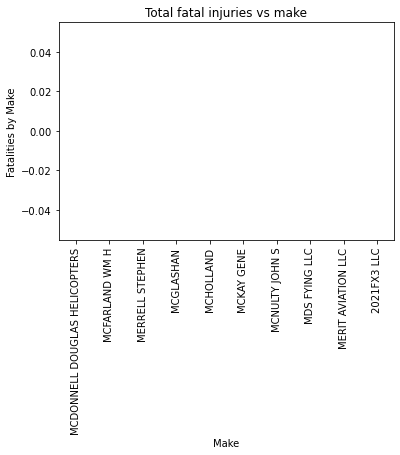

In [2370]:
make_fatalinjuries=Aviationdata2.groupby("Make")["Total.Fatal.Injuries"].sum().sort_values(ascending=False).tail(10)
#make_fatalinjuries.head(10)

make_fatalinjuries.plot(kind="bar")
plt.title('Total fatal injuries vs make')
plt.ylabel("Fatalities by Make")
plt.show()

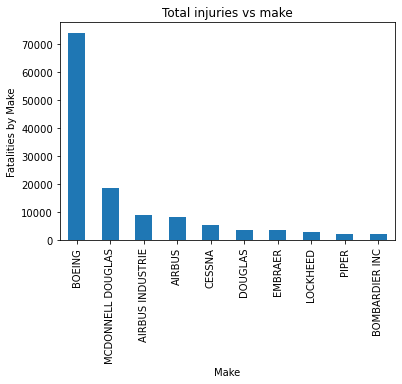

In [2371]:
make_injuries=Aviationdata2.groupby("Make")["Total.Uninjured"].sum().sort_values(ascending=False).head(10)
#make_fatalinjuries.head(10)

make_injuries.plot(kind="bar")
plt.title('Total injuries vs make')
plt.ylabel("Fatalities by Make")
plt.show()

In [2347]:
Aviationdata2_scatter = Aviationdata2[['Total.Fatal.Injuries', 'Broad.phase.of.flight']]

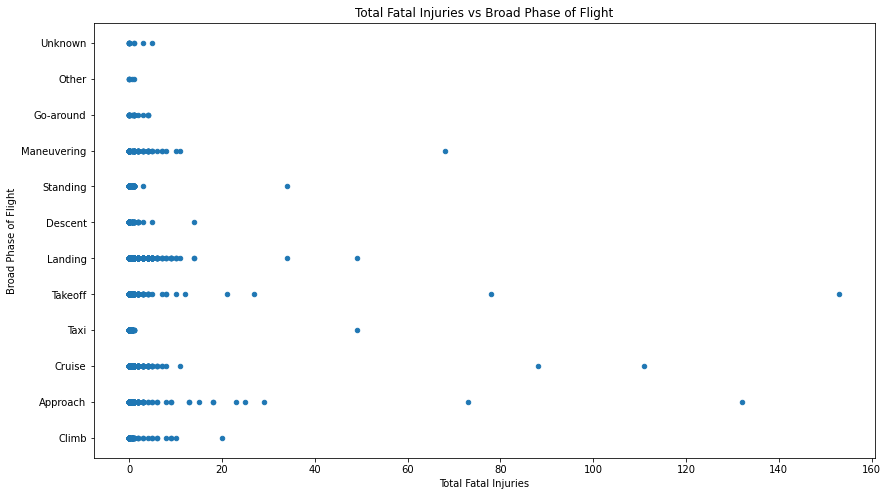

In [2350]:
ax = Aviationdata2_scatter.plot(kind='scatter', x='Total.Fatal.Injuries', y='Broad.phase.of.flight', figsize=(14, 8))

# Set the title and labels
plt.title('Total Fatal Injuries vs Broad Phase of Flight')
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Broad Phase of Flight')

# Show the plot
plt.show()

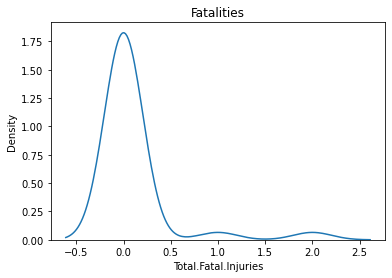

In [2375]:
sns.kdeplot(Aviationdata2["Total.Fatal.Injuries"].sample(30).reset_index(drop=True))
plt.title("Fatalities")
plt.show()

In [2359]:
fatalities = Aviationdata2['Total.Fatal.Injuries'].value_counts()

In [2360]:
fatalities.tail(10)

21.0     1
25.0     1
153.0    1
111.0    1
12.0     1
29.0     1
20.0     1
73.0     1
132.0    1
78.0     1
Name: Total.Fatal.Injuries, dtype: int64

# Conclusion

##### 1. The business should invest in planes with one or two Engines
##### 2. Considering the total number of the uninjured Boieng comes out as the better recomended Make of a plane to inverst with >70000 uninjured, on the other hand Boieng had 700 fatalities
##### 3.